## Data Analysis

In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Data/langthanghanoiofficial_cleaned.csv')

Đây là dữ liệu thu thập được từ fanpage langthanghanoi bao gồm dữ liệu của 121 bài viết kể từ này 4-11-2023 đến ngày 9-11-2023.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        100 non-null    int64  
 1   text                           100 non-null    object 
 2   post_text                      100 non-null    object 
 3   shared_text                    100 non-null    object 
 4   original_text                  100 non-null    object 
 5   time                           100 non-null    object 
 6   timestamp                      100 non-null    int64  
 7   images_description             100 non-null    object 
 8   images_lowquality              100 non-null    object 
 9   images_lowquality_description  100 non-null    object 
 10  likes                          100 non-null    int64  
 11  comments                       100 non-null    int64  
 12  shares                         100 non-null    int6

## Bài viết có lượt tương tác cao nhất

In [5]:
df['total_interactions'] = df['likes'] + df['comments'] + df['shares']
top_post = df.loc[df['total_interactions'].idxmax()]
top_post

post_id                                                            641239981517512
text                             HÀNG MÃ NGAY LÚC NÀY ‼️‼️‼️\n\nĐÓN NOEL SỚM TH...
post_text                        HÀNG MÃ NGAY LÚC NÀY ‼️‼️‼️\n\nĐÓN NOEL SỚM TH...
shared_text                                                               Không có
original_text                                                             Không có
time                                                           2023-11-06 08:53:58
timestamp                                                               1699260838
images_description               ['May be an image of one or more people, chris...
images_lowquality                ['https://scontent.fhan5-8.fna.fbcdn.net/v/t39...
images_lowquality_description    ['May be an image of one or more people, chris...
likes                                                                        16000
comments                                                                      6500
shar

## Tính trung bình số lượt 'likes', 'comments', và 'shares'

In [6]:
average_likes = df['likes'].mean()
average_comments = df['comments'].mean()
average_shares = df['shares'].mean()

Số lượt like trung bình mỗi bài

In [7]:
average_likes

4527.29

Số lượt comments trung bình mỗi bài

In [8]:
average_comments

1339.21

Số lượt shares trung bình mỗi bài

In [9]:
average_shares

183.05

## Thời gian đăng bài

In [10]:
df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.hour
hourly_distribution = df['hour'].value_counts().sort_index()

<Axes: xlabel='hour'>

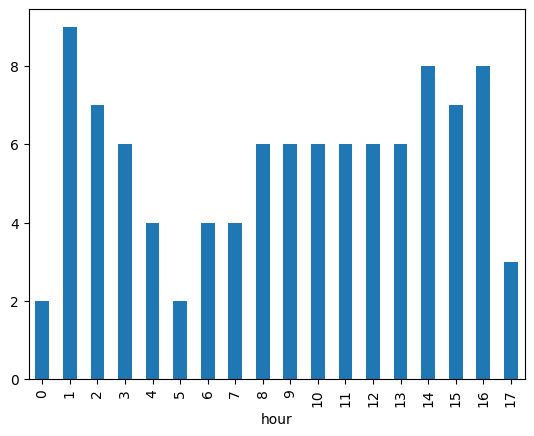

In [11]:
hourly_distribution.plot(kind='bar')

## Lượt tương tác theo thời gian


<Axes: xlabel='time'>

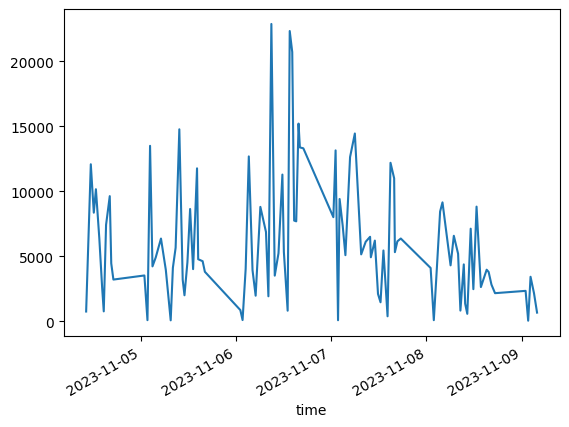

In [12]:
df.set_index('time')['total_interactions'].plot()

Số lượt tương tác theo giờ


<Axes: title={'center': 'Tương tác theo giờ trong ngày'}, xlabel='hour'>

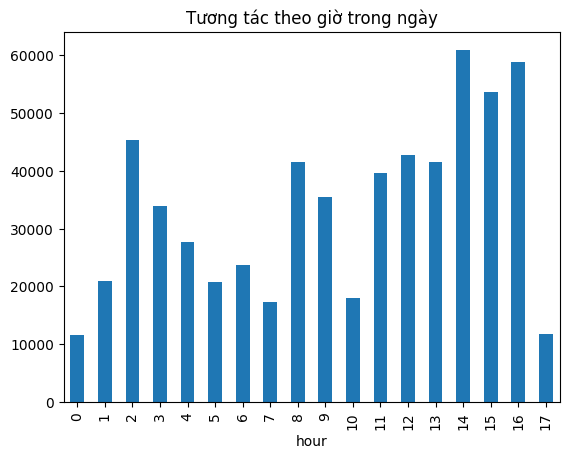

In [13]:
interactions_by_hour = df.groupby('hour')['total_interactions'].sum().sort_index()
interactions_by_hour.plot(kind='bar', title='Tương tác theo giờ trong ngày')

## Tương Quan Giữa Số Lượng Reactions và Các Trường Khác

In [14]:
correlation = df[['likes', 'comments', 'shares']].corr()

<Axes: >

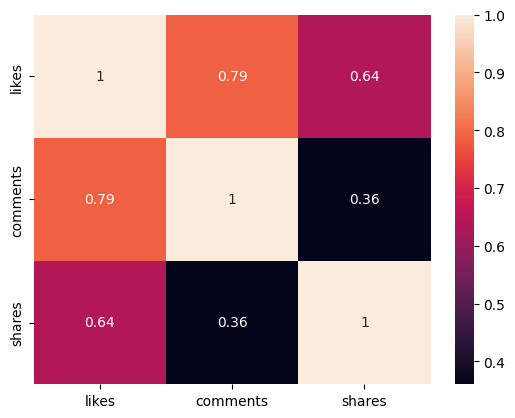

In [15]:
sns.heatmap(correlation, annot=True)

## Phân tích số lượng các reactions khác nhau được thả

In [16]:
first_row = df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']
reactions

{'like': 298,
 'love': 3,
 'haha': 30,
 'care': 1,
 'sad': 1,
 'shares': 5,
 'comments': 365}

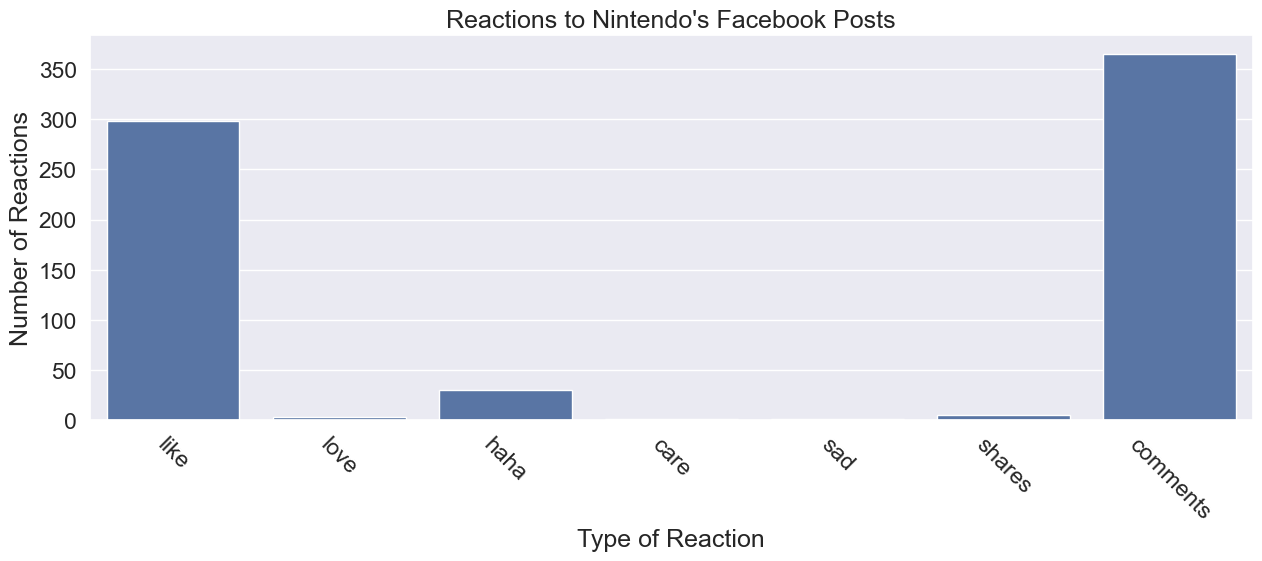

In [17]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Reactions to Nintendo's Facebook Posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

## Đọc tất cả các posts

In [18]:
df_text = df[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

,post_id,post_text
0,642571108051066,T..A..G NGƯỜI THỨ 2 ‼️ SẼ BAO BẠN ĐI CAFE ‼️\n...
1,642556798052497,TIN BUỒN CHO NGƯỜI CÔ ĐƠN ‼️\n\nĐÊM CHỦ NHẬT M...
2,642540428054134,TÀ XÙA VÀO MÙA SĂN MÂY ĐẸP NHẤT NĂM ‼️\n\nBÌNH...
3,642528298055347,T..A..G NGƯỜI BẠN TÊN T ‼️\n\nSẼ TẶNG BẠN VÁY ...
4,642516461389864,Lương tháng 5 trẹo ở\nHà Nội thì nên ăn gì cho...
...,...,...
95,640386361602874,HỒ TÂY NGAY LÚC NÀY ‼️\n\nRA MÀ XEM HỌ ĐƯA NGƯ...
96,640363138271863,Ơ tối thứ 7 mà ko đi chơi với người yêu à ? 🤣\...
97,640350884939755,"Hạnh phúc là...\n\nĐi làm một ngày được 300k, ..."
98,640335034941340,Tối nay mà có ai rủ đi Hồ Tây thì thích nhỉ🧐


Tổng hợp những từ ngữ xuất hiện nhiều nhất trong post_text

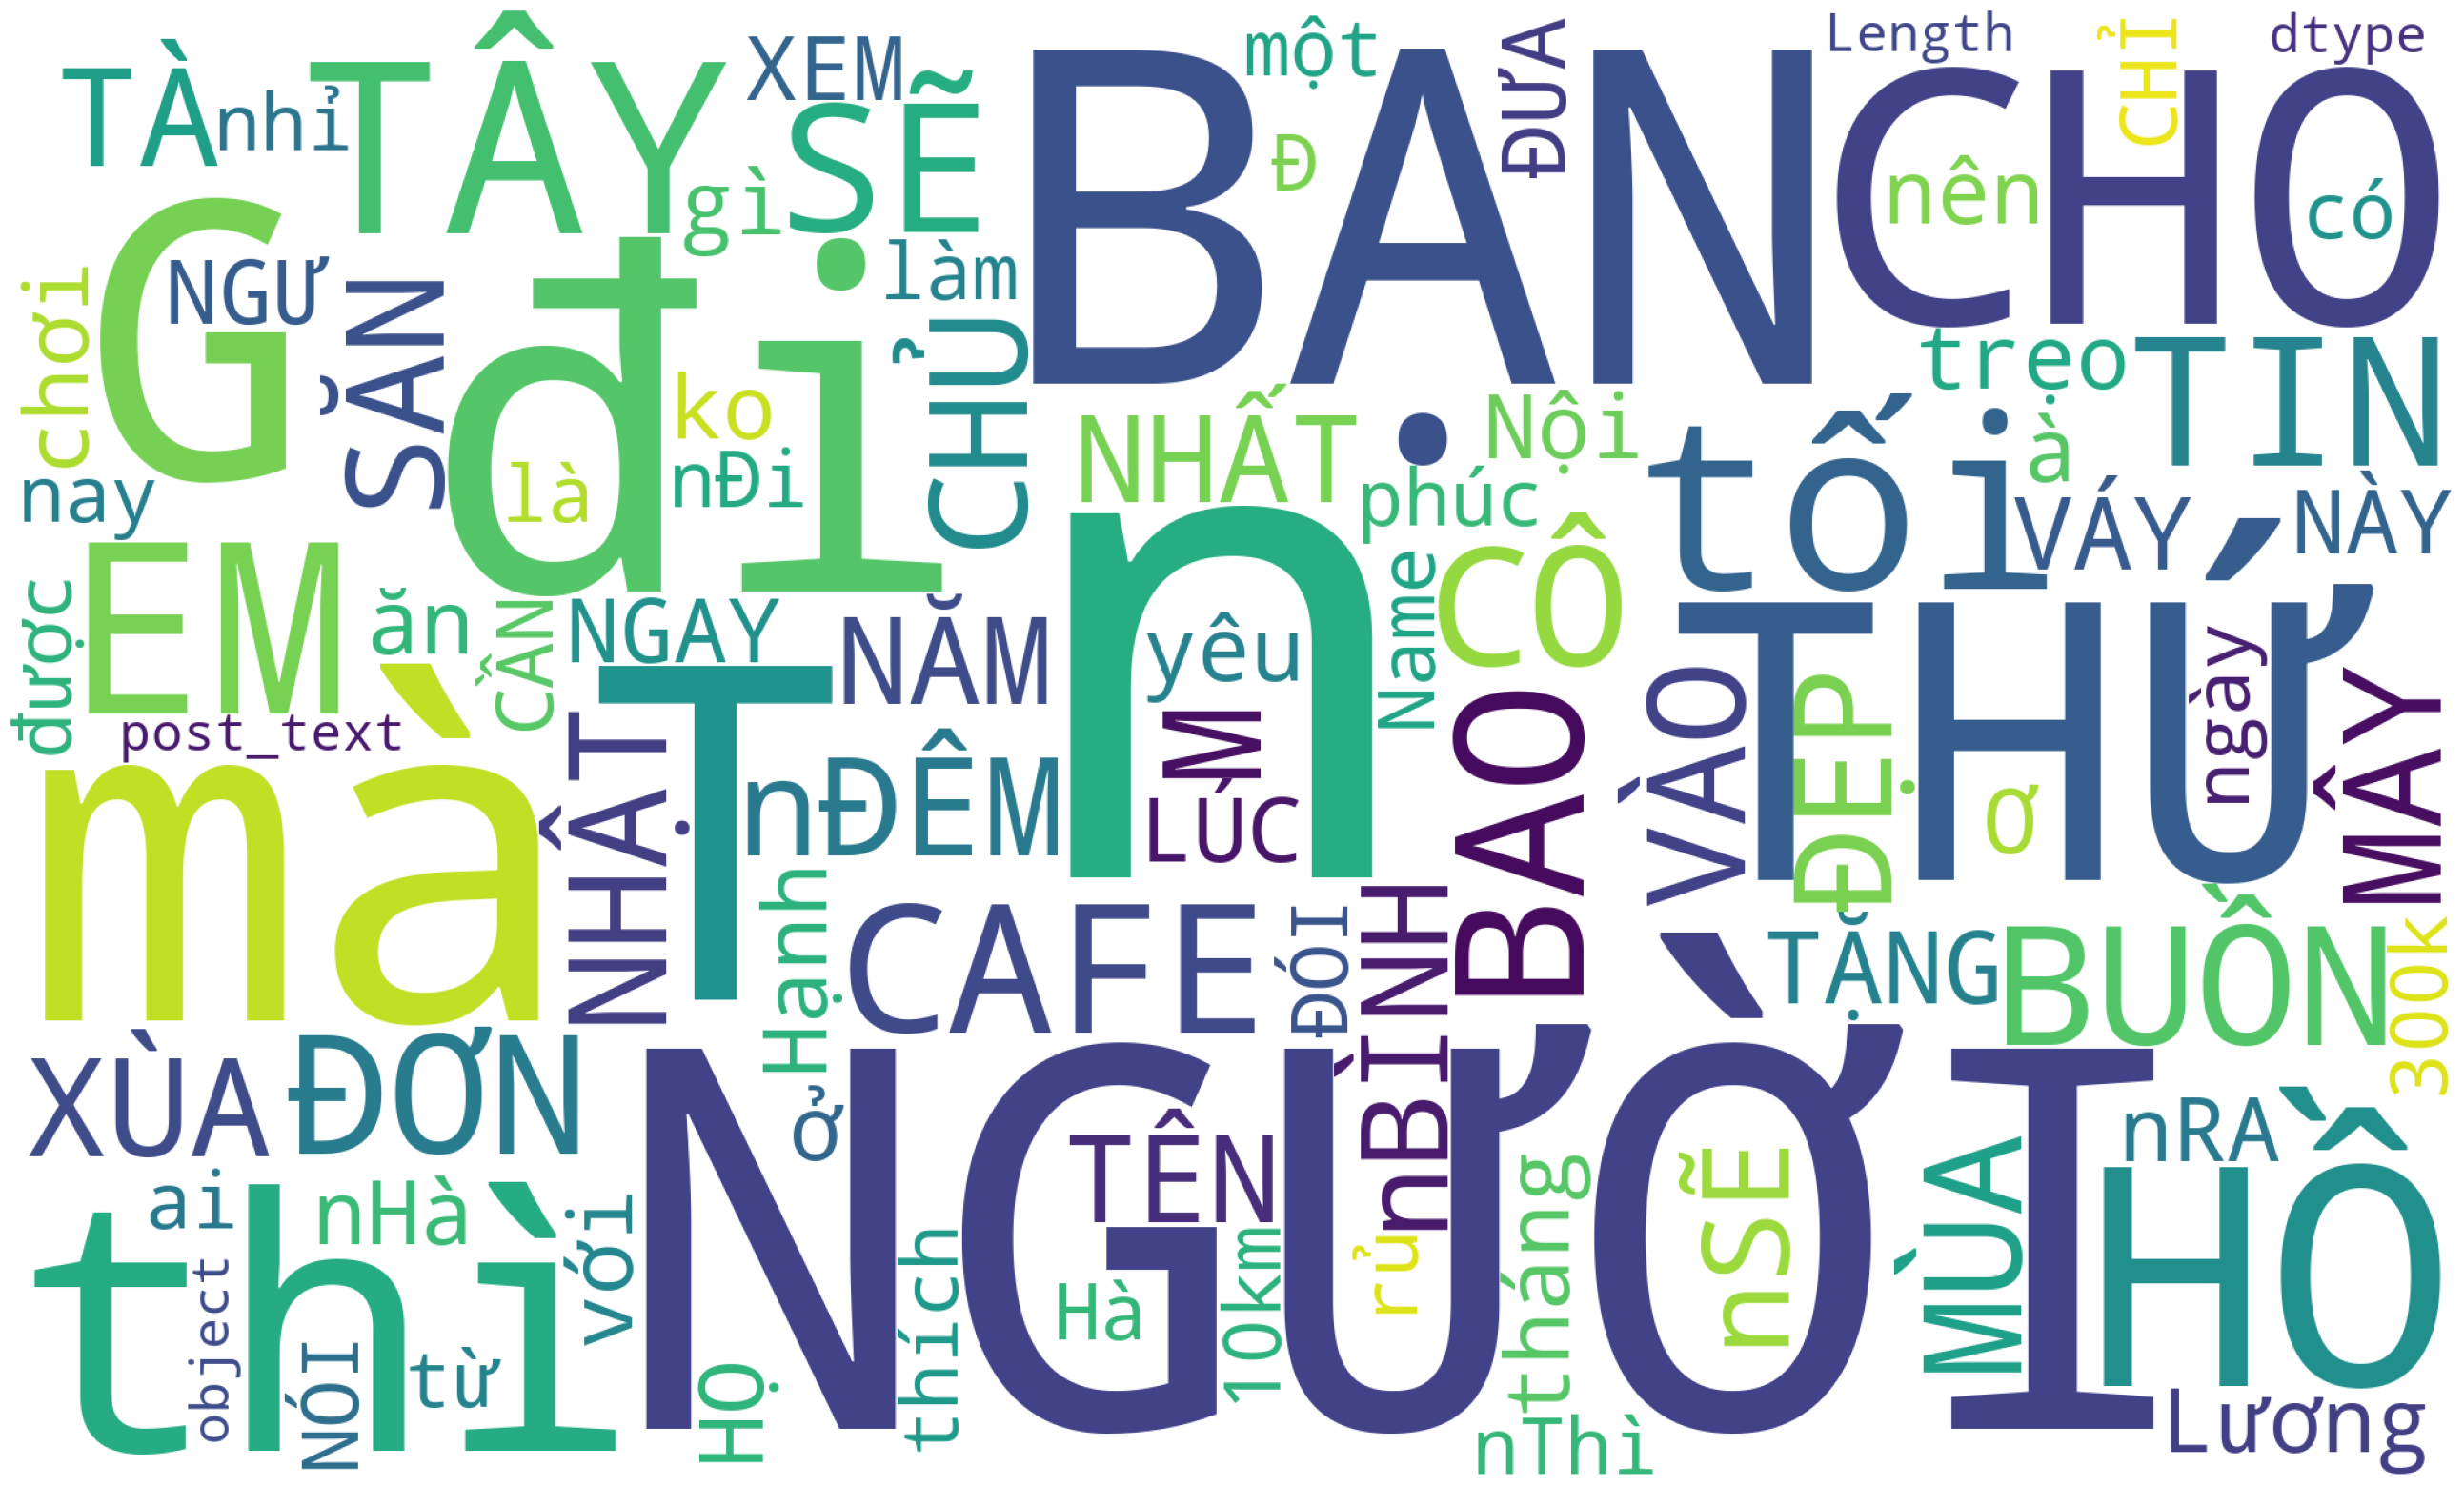

In [19]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Mối quan hệ giữa độ dài bài viết và tương tác

In [20]:
# Tính độ dài bài viết (sử dụng số từ)
df['post_length'] = df['text'].apply(lambda x: len(str(x).split()))

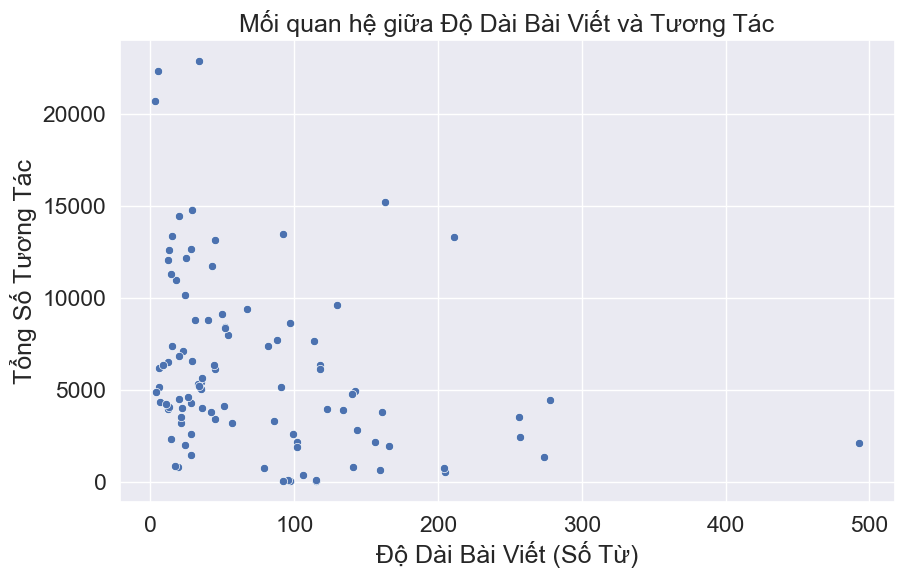

In [22]:
# Trực quan hóa mối quan hệ
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='post_length', y='total_interactions')
plt.title('Mối quan hệ giữa Độ Dài Bài Viết và Tương Tác')
plt.xlabel('Độ Dài Bài Viết (Số Từ)')
plt.ylabel('Tổng Số Tương Tác')
plt.show()

## Mối quan hệ giữa Reaction và Comments

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='reaction_count', y='comments')
plt.title('Mối quan hệ giữa Reactions và Bình Luận')
plt.xlabel('Số Lượng Reactions')
plt.ylabel('Số Lượng Bình Luận')
plt.show()